In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y) # Not used anywhere for training or testing because this is an unsupervised algorithm.
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  

Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+

In [3]:
# Training the SOM
from minisom import MiniSom
# x & y are the dimentions of the map
# input_len is the number of input neurons
# sigma is the radius of the centroid neurons
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

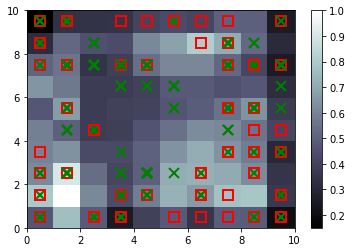

In [4]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
# blank map by bone()
bone()
# adding color to the map between 0 to 1
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    # get the winner neuron
    w = som.winner(x)
    # get the markers to the center of the cell so, add 0.5 to the coordinates of the neurons.
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [5]:
# Finding the frauds
# winning maps are the white blocks in the visualization plotted above. White blocs shows the potential fraud customers. 
# mappings are in the form of dictionary
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)

# mappings[(x,y)], here x & y are the coordinates of the white blocks in the winning maps.
# axis=0 will arrange the concatinated winning blocks one below other i.e. in vertical order.
frauds = np.concatenate((mappings[(1,2)], mappings[(6,8)]), axis = 0)

# get the original values in the dataset
frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(8, 0): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.7289622 , 1.        , 0.31954887, 0.12053571, 0.5       ,
       0.53846154, 0.875     , 0.29087719, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.98014648, 1.        , 0.30706767, 0.09821429, 0.5       ,
       0.15384615, 0.5       , 0.0877193 , 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.116     , 0.002     ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
       0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,


In [6]:
# Going from unsupervised to supervised part where ANN is used to train our model.
# Matrix of features
customers = dataset.iloc[:,1:].values # last column is not considered

# Create dependent variable
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [7]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
from keras.models import Sequential # Used for initializing our NN
from keras.layers import Dense # Used for building hidden layers

classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)
y_pred = classifier.predict(customers)

# Concatinate the above calculated y_pred with the 1st column of our dataset
# to amalgamate all customers with their respective potential fraud probablilities.
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

# Sort the customers w.r.t the least to max probablilities of potential fraud.
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.9725
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1835 - accuracy: 0.9725
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1858 - accuracy: 0.9725
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1551 - accuracy: 0.9725
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1599 - accuracy: 0.9725


In [18]:
# Create an output CSV file
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df

,Customers,Fraud_probability
0,15799785.0,0.000057
1,15621423.0,0.000078
2,15671293.0,0.000623
3,15723827.0,0.000734
4,15706394.0,0.000825
...,...,...
685,15583552.0,0.350222
686,15568819.0,0.350222
687,15773789.0,0.350222
688,15778345.0,0.350222
